In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
data_male = pd.read_csv('cleaned_male.csv')

In [4]:
size_t = []

for chest, waist in zip(data_male['chestcircumference'], data_male['waistcircumference']):
    if chest < 880:
        if waist >= 760:
            size_t.append('Small')
        else:
            size_t.append('X-Small')
    elif chest < 960:
        if waist >= 840:
            size_t.append('Medium')
        else:
            size_t.append('Small')
    elif chest < 1040:
        if waist >= 920:
            size_t.append('Large')
        else:
            size_t.append('Medium')
    elif chest < 1120:
        if waist >= 1000:
            size_t.append('X-Large')
        else:
            size_t.append('Large')
    elif chest < 1200:
        if waist >= 1080:
            size_t.append('XX-Large')
        else:
            size_t.append('X-Large')
    elif chest < 1270:
        size_t.append('XX-Large')
    elif chest < 1345:
        size_t.append('XXX-Large')
    elif chest < 1500:
        size_t.append('XXXX-Large')

data_male['Size_t'] = size_t

In [5]:
combined_list = list(zip(data_male['stature'], data_male['weightkg']))
X = np.array(combined_list)

y = np.array(data_male['Size_t'])

X.reshape(1, -1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)


dtree_t = DecisionTreeClassifier()
dtree_t = dtree_t.fit(X_train, y_train)

In [6]:
path = dtree_t.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

clf_dts = []
for ccp_alpha in ccp_alphas:
    dtree_t = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    dtree_t.fit(X_train, y_train)
    clf_dts.append(dtree_t)

train_scores = [dtree_t.score(X_train, y_train) for dtree_t in clf_dts]
test_scores = [dtree_t.score(X_test, y_test) for dtree_t in clf_dts]

[]

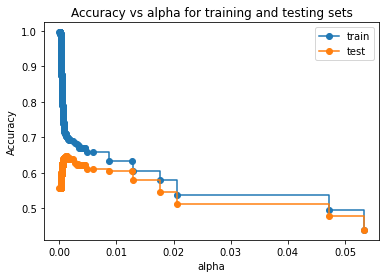

In [7]:
_, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.plot()

<AxesSubplot:xlabel='tree'>

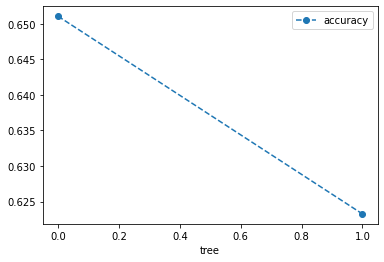

In [8]:
dtree_t = DecisionTreeClassifier(random_state=42, ccp_alpha=0.002)
scores = cross_val_score(dtree_t, X_train, y_train, cv=2)
df = pd.DataFrame(data={'tree': range(2), 'accuracy': scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<AxesSubplot:xlabel='alpha'>

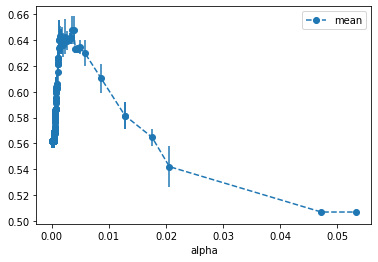

In [9]:
alpha_scores = []
for ccp_alpha in ccp_alphas:
    dtree_t = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(dtree_t, X_train, y_train, cv=2)
    alpha_scores.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_scores, columns=['alpha', 'mean', 'std'])
alpha_results.plot(x='alpha', y='mean', yerr='std', marker='o', linestyle='--')

In [10]:
clf_dt_pruned_t = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0013)
clf_dt_pruned_t = clf_dt_pruned_t.fit(X_train, y_train)

[Text(0.48, 0.9375, '[1702  726] <= 831.5\ngini = 0.775\nsamples = 2734\nvalue = [826, 704, 282, 587, 23, 283, 27, 2]\nclass = XS'),
 Text(0.21, 0.8125, '[1702  726] <= 699.5\ngini = 0.642\nsamples = 1277\nvalue = [324, 631, 282, 17, 23, 0, 0, 0]\nclass = S'),
 Text(0.08, 0.6875, '[1702  726] <= 653.5\ngini = 0.522\nsamples = 367\nvalue = [5, 113, 226, 0, 23, 0, 0, 0]\nclass = M'),
 Text(0.04, 0.5625, '[1702  726] <= 570.5\ngini = 0.447\nsamples = 162\nvalue = [0, 23, 116, 0, 23, 0, 0, 0]\nclass = M'),
 Text(0.02, 0.4375, 'gini = 0.472\nsamples = 21\nvalue = [0, 0, 8, 0, 13, 0, 0, 0]\nclass = XL'),
 Text(0.06, 0.4375, '[1776  815] <= 1581.5\ngini = 0.382\nsamples = 141\nvalue = [0, 23, 108, 0, 10, 0, 0, 0]\nclass = M'),
 Text(0.04, 0.3125, 'gini = 0.346\nsamples = 9\nvalue = [0, 7, 2, 0, 0, 0, 0, 0]\nclass = S'),
 Text(0.08, 0.3125, 'gini = 0.335\nsamples = 132\nvalue = [0, 16, 106, 0, 10, 0, 0, 0]\nclass = M'),
 Text(0.12, 0.5625, '[1776  815] <= 1694.5\ngini = 0.519\nsamples = 205\nv

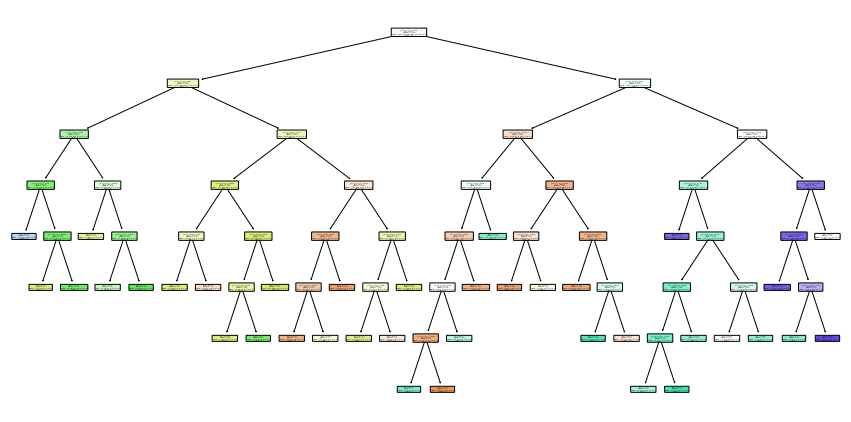

In [13]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned_t,
          filled=True,
          rounded=True,
          class_names=['XS', 'S', 'M', 'L', 'XL', 'XXL','XXXL','XXXXL'],
          )